## Importando as bibliotecas

In [24]:
import tensorflow as tf
from tensorflow import keras
import warnings
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

warnings.filterwarnings('ignore')

## Carregando o conjunto de dados

In [2]:
# Carregando o dataset Fashion MNIST do Keras.
dataset = keras.datasets.fashion_mnist

# Carregando as imagens de treino e teste e as identificações das imagens.
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

## Treinando o modelo (original)

Para dar continuidade no projeto anterior, algumas células de código foram deletadas.

In [3]:
# Normalizando as imagens.
imagens_treino = imagens_treino/float(255)

In [4]:
# Criando o modelo.
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # Entrada - camada 0: está “achatando” as nossas imagens de 28 por 28 pixels em um array de 784 pixels.
    keras.layers.Dense(256, activation=tf.nn.relu), # Processamento - Camada 1: 256 neurônios, função de ativação relu (Função não linear))(Neural networks).
    keras.layers.Dropout(0.2), # Normalização - Dropout de 20% dos neurônios.
    keras.layers.Dense(10, activation=tf.nn.softmax) # Saída - Camada 2: 10 neurônios (categorias), função de ativação softmax (Probabilidade de cada categoria).
])

# Compilando o modelo.
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Treinando o modelo.
historico = modelo.fit(imagens_treino, 
                    identificacoes_treino, 
                    epochs=5, # Treinando 5 vezes.
                    validation_split=0.2) # 20% dos dados de treino para validação.



Epoch 1/5


1500/1500 [==============================] - 19s 5ms/step - loss: 0.5275 - accuracy: 0.8125 - val_loss: 0.4042 - val_accuracy: 0.8541
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3971 - accuracy: 0.8557 - val_loss: 0.3679 - val_accuracy: 0.8646
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3622 - accuracy: 0.8662 - val_loss: 0.3504 - val_accuracy: 0.8735
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3404 - accuracy: 0.8747 - val_loss: 0.3425 - val_accuracy: 0.8736
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3232 - accuracy: 0.8800 - val_loss: 0.3574 - val_accuracy: 0.8658


### Visualizando as acurácias e perdas de treino e validação por época

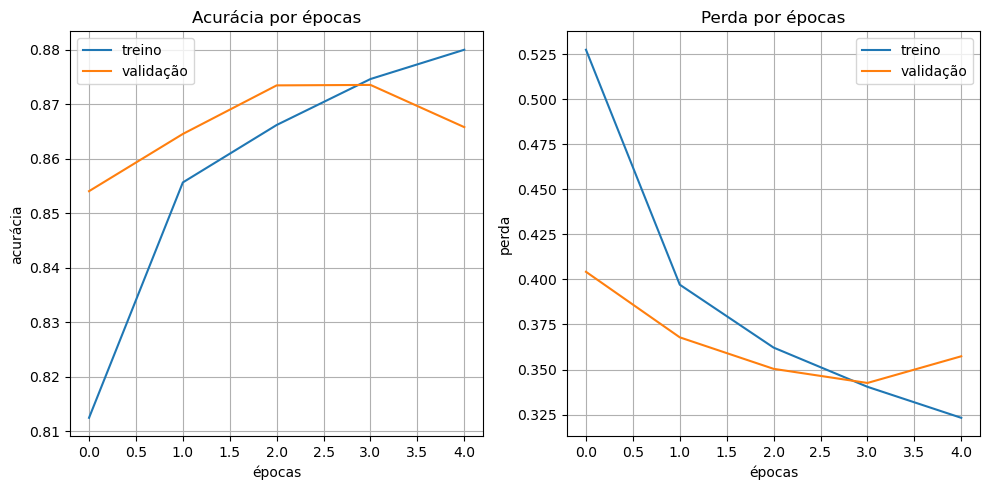

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

axs[0].plot(historico.history['accuracy'])
axs[0].plot(historico.history['val_accuracy'])
axs[0].set_title('Acurácia por épocas')
axs[0].set_xlabel('épocas')
axs[0].set_ylabel('acurácia')
axs[0].legend(['treino', 'validação'])
axs[0].grid(True)

axs[1].plot(historico.history['loss'])
axs[1].plot(historico.history['val_loss'])
axs[1].set_title('Perda por épocas')
axs[1].set_xlabel('épocas')
axs[1].set_ylabel('perda')
axs[1].legend(['treino', 'validação'])
axs[1].grid(True)

plt.tight_layout()
plt.show()

### Testando o modelo

In [6]:
# Testando o modelo.
testes = modelo.predict(imagens_teste)

# Verificando o resultado do teste com as identificações de teste.
print(f'Restultado do teste: {np.argmax(testes[1])}')
print(f'Número da imagem de teste: {identificacoes_teste[1]}')

313/313 [==============================] - 1s 2ms/step
Restultado do teste: 2
Número da imagem de teste: 2


### Avaliando o modelo

In [7]:
# Avaliando o modelo: calculando a perda e acurácia.
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print(f'Perda do teste: {perda_teste}\nAcurácia do teste: {acuracia_teste}')

313/313 [==============================] - 1s 2ms/step - loss: 55.5145 - accuracy: 0.8548
Perda do teste: 55.5145263671875
Acurácia do teste: 0.8547999858856201


### Gerando o sumário

In [8]:
# Analisando o sumário do modelo.
sumario_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
peso_camada_dense = modelo.layers[1].get_weights()[0]
vieses_camada_dense = modelo.layers[1].get_weights()[1]

#### Criando função para recompilação

In [10]:
def recompile_model(modelo):
    
    # Taxa de aprendizado.
    adam = keras.optimizers.Adam(lr=0.002)

    callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
                 keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5', monitor='val_loss', save_best_only=True)]

    # Compilando o modelo.
    modelo.compile(optimizer=adam, 
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

    # Treinando o modelo.
    historico = modelo.fit(imagens_treino, identificacoes_treino, 
                            epochs=5, # Treinando 5 vezes.
                            batch_size=480, # 480 imagens por batch.
                            callbacks=callbacks, # Parando o treinamento quando a perda de validação não melhora mais.
                            validation_split=0.2) # 20% dos dados de treino para validação.
       
    # Gerando gráficos de acurácia e perda.
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    axs[0].plot(historico.history['accuracy'])
    axs[0].plot(historico.history['val_accuracy'])
    axs[0].set_title('Acurácia por épocas')
    axs[0].set_xlabel('épocas')
    axs[0].set_ylabel('acurácia')
    axs[0].legend(['treino', 'validação'])
    axs[0].grid(True)

    axs[1].plot(historico.history['loss'])
    axs[1].plot(historico.history['val_loss'])
    axs[1].set_title('Perda por épocas')
    axs[1].set_xlabel('épocas')
    axs[1].set_ylabel('perda')
    axs[1].legend(['treino', 'validação'])
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

#### Peso zerado x Vieses

Epoch 1/5
100/100 [==============================] - 3s 21ms/step - loss: 1.0000 - accuracy: 0.6555 - val_loss: 0.5937 - val_accuracy: 0.7933
Epoch 2/5
100/100 [==============================] - 2s 16ms/step - loss: 0.5647 - accuracy: 0.8041 - val_loss: 0.4879 - val_accuracy: 0.8295
Epoch 3/5
100/100 [==============================] - 1s 13ms/step - loss: 0.4891 - accuracy: 0.8284 - val_loss: 0.4478 - val_accuracy: 0.8435
Epoch 4/5
100/100 [==============================] - 1s 12ms/step - loss: 0.4518 - accuracy: 0.8415 - val_loss: 0.4211 - val_accuracy: 0.8539
Epoch 5/5
100/100 [==============================] - 1s 11ms/step - loss: 0.4251 - accuracy: 0.8512 - val_loss: 0.4086 - val_accuracy: 0.8541


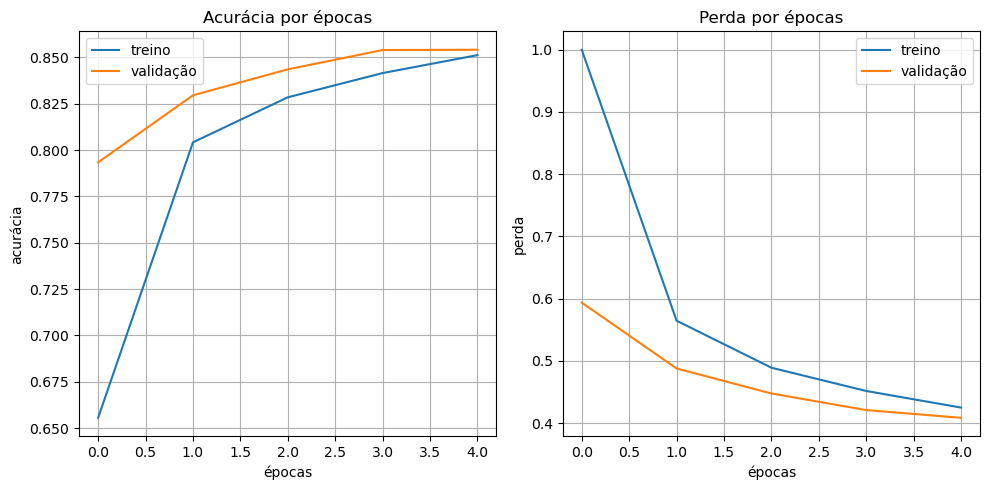

In [11]:
peso_camada_dense_zerado = np.zeros(peso_camada_dense.shape)
modelo.layers[1].set_weights([peso_camada_dense_zerado, vieses_camada_dense])
recompile_model(modelo)

#### Peso randomizado x Vieses

Epoch 1/5
100/100 [==============================] - 3s 21ms/step - loss: 343.5174 - accuracy: 0.1292 - val_loss: 15.4836 - val_accuracy: 0.4818
Epoch 2/5
100/100 [==============================] - 1s 11ms/step - loss: 150.6771 - accuracy: 0.2243 - val_loss: 17.1338 - val_accuracy: 0.6026
Epoch 3/5
100/100 [==============================] - 1s 10ms/step - loss: 113.4978 - accuracy: 0.3088 - val_loss: 15.7972 - val_accuracy: 0.6238
Epoch 4/5
100/100 [==============================] - 1s 12ms/step - loss: 89.8027 - accuracy: 0.3740 - val_loss: 13.7715 - val_accuracy: 0.6620
Epoch 5/5
100/100 [==============================] - 1s 12ms/step - loss: 72.1848 - accuracy: 0.4293 - val_loss: 14.1377 - val_accuracy: 0.6714


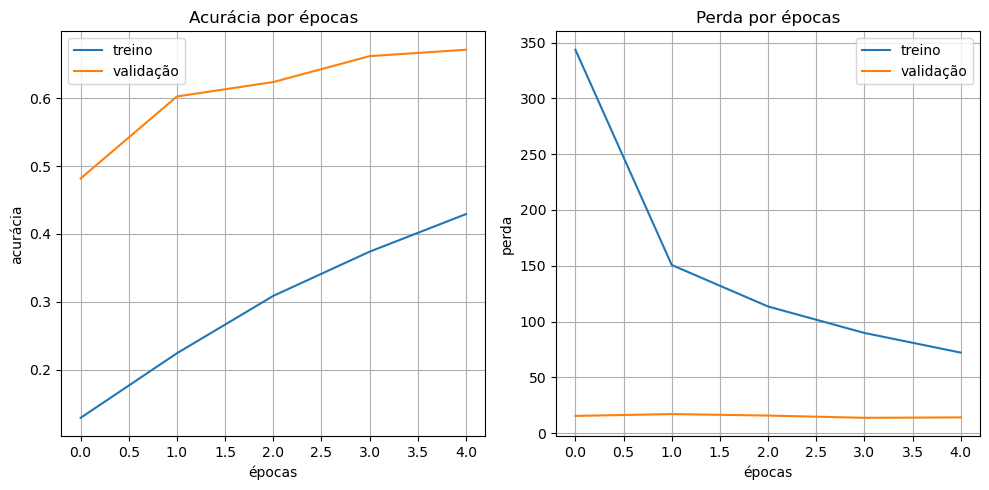

In [12]:
peso_camada_dense_random = np.random.rand(784, 256)
modelo.layers[1].set_weights([peso_camada_dense_random, vieses_camada_dense])
recompile_model(modelo)

#### Peso zerado x Vieses zerados

Epoch 1/5
100/100 [==============================] - 2s 13ms/step - loss: 2.3328 - accuracy: 0.0999 - val_loss: 2.3261 - val_accuracy: 0.1003
Epoch 2/5
100/100 [==============================] - 1s 10ms/step - loss: 2.3193 - accuracy: 0.0999 - val_loss: 2.3153 - val_accuracy: 0.1003
Epoch 3/5
100/100 [==============================] - 1s 13ms/step - loss: 2.3113 - accuracy: 0.0999 - val_loss: 2.3092 - val_accuracy: 0.1003
Epoch 4/5
100/100 [==============================] - 1s 11ms/step - loss: 2.3068 - accuracy: 0.0985 - val_loss: 2.3059 - val_accuracy: 0.0983
Epoch 5/5
100/100 [==============================] - 1s 10ms/step - loss: 2.3045 - accuracy: 0.0988 - val_loss: 2.3041 - val_accuracy: 0.0983


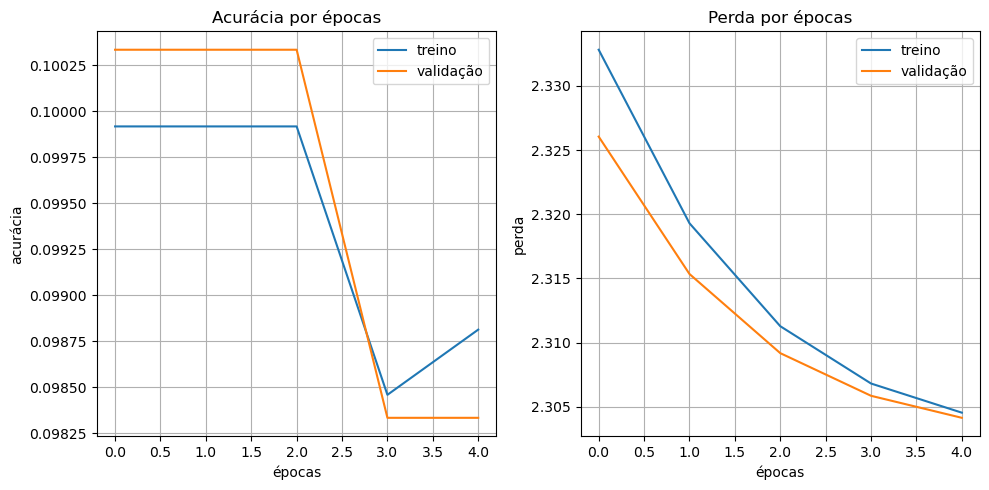

In [13]:
peso_camada_dense_zerado = np.zeros(peso_camada_dense.shape)
vieses_camada_dense_zerado = np.zeros(vieses_camada_dense.shape)
modelo.layers[1].set_weights([peso_camada_dense_zerado, vieses_camada_dense_zerado])
recompile_model(modelo)

#### Peso randomizado x Vieses zerados

Epoch 1/5
100/100 [==============================] - 2s 17ms/step - loss: 145.6723 - accuracy: 0.1775 - val_loss: 17.9426 - val_accuracy: 0.4718
Epoch 2/5
100/100 [==============================] - 1s 12ms/step - loss: 84.5647 - accuracy: 0.3112 - val_loss: 14.3165 - val_accuracy: 0.6251
Epoch 3/5
100/100 [==============================] - 1s 12ms/step - loss: 58.7803 - accuracy: 0.4012 - val_loss: 10.9052 - val_accuracy: 0.6450
Epoch 4/5
100/100 [==============================] - 1s 13ms/step - loss: 43.7676 - accuracy: 0.4623 - val_loss: 9.7579 - val_accuracy: 0.6909
Epoch 5/5
100/100 [==============================] - 1s 11ms/step - loss: 33.1533 - accuracy: 0.5091 - val_loss: 8.8215 - val_accuracy: 0.7000


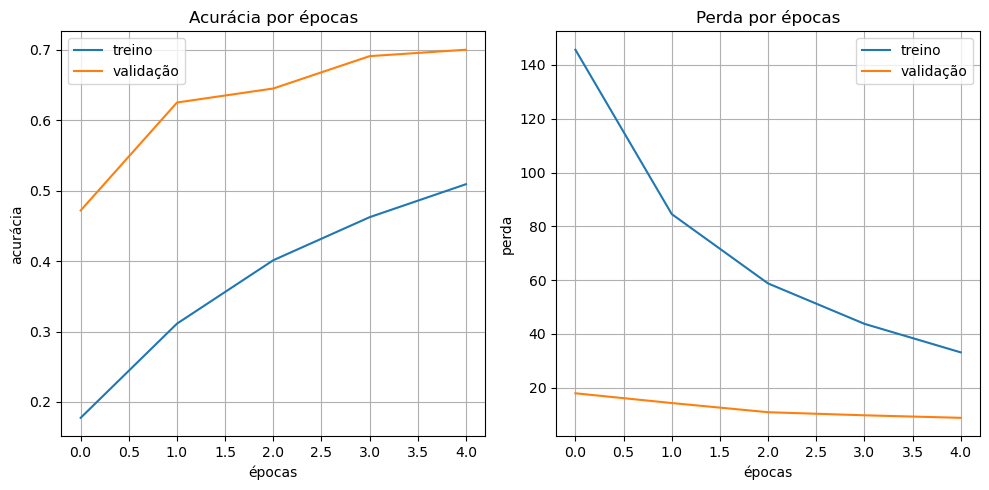

In [14]:
peso_camada_dense_random = np.random.rand(784, 256)
vieses_camada_dense_zerado = np.zeros(vieses_camada_dense.shape)
modelo.layers[1].set_weights([peso_camada_dense_random, vieses_camada_dense_zerado])

recompile_model(modelo)

#### Analisando as configurações do modelo

In [25]:
modelo_config = modelo.get_config()

pprint(modelo_config)

{'layers': [{'class_name': 'InputLayer',
             'config': {'batch_input_shape': (None, 28, 28),
                        'dtype': 'float32',
                        'name': 'flatten_input',
                        'ragged': False,
                        'sparse': False},
             'module': 'keras.layers',
             'registered_name': None},
            {'build_config': {'input_shape': (None, 28, 28)},
             'class_name': 'Flatten',
             'config': {'batch_input_shape': (None, 28, 28),
                        'data_format': 'channels_last',
                        'dtype': 'float32',
                        'name': 'flatten',
                        'trainable': True},
             'module': 'keras.layers',
             'registered_name': None},
            {'build_config': {'input_shape': (None, 784)},
             'class_name': 'Dense',
             'config': {'activation': 'relu',
                        'activity_regularizer': None,
                       